In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing as pre
from scipy.sparse import csr_matrix
import scipy as sp
from tqdm import tqdm_notebook as tqdm
from nltk.corpus import stopwords
from pymystem3 import Mystem
from nltk.tokenize import WordPunctTokenizer, RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score

from string import punctuation
import string
import matplotlib.pyplot as plt
import re
from nltk.tokenize import sent_tokenize, word_tokenize

%load_ext nb_black
%matplotlib inline

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
df_train = pd.read_csv("lang_labeled.csv", sep=";", error_bad_lines=False)
df_train.head()

,Text,Language
0,��👟👟В НАЛИЧИИ 👟👟👟 🇬🇧🇬🇧🇬🇧Reebok🇬🇧🇬🇧🇬🇧 В раз...,ru
1,"Роман Грищенко Кроссфит-атлет, вице-чемпион Бо...",ru
2,Предлагаю: Коньки фигурные Reebok за 2000руб. ...,ru
3,28 февраля на территории с. Ивантиеевка и Иван...,ru
4,Reebok 1000руб 36-41 маломерят на размер,ru


<IPython.core.display.Javascript object>

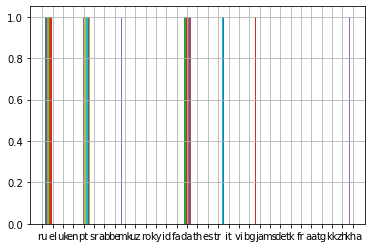

<IPython.core.display.Javascript object>

In [20]:
df_train["Language"].hist()

In [68]:
df_labels = df_train.groupby("Language").count()
df_labels

,Text
Language,
aa,11
ab,11
be,76
bg,206
da,81
de,37
el,12
en,1000
es,63


<IPython.core.display.Javascript object>

In [62]:
def delete_hashtags(text):
    temp = []
    hashtag_pattern = re.compile("#\S+")
    at_pattern = re.compile("@\S+")
    for i in text:
        h = hashtag_pattern.sub(r"", str(i.split(" ")))
        a = at_pattern.sub(r"", h)
        temp.append(a)
    return temp


def preprocess_text(text):
    temp = []
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    hashtag_pattern = re.compile("#\S+")
    for i in text:
        tokenizer = WordPunctTokenizer()
        tokenizer = RegexpTokenizer(r"\w+")
        tokens = tokenizer.tokenize(str(i).lower())
        tokens = [
            token
            for token in tokens
            if token != " "
            and token.strip() not in punctuation
            and re.sub(r"\d+", "", token)
        ]

        i = " ".join(tokens)
        temp.append(i)
    return temp


def null_tokens(text):
    temp = []
    for k, i in enumerate(text):
        if i == "":
            i = re.sub(r"", df_train.Text[k], i)
            i = " ".join(re.split("[#@]", i))
        temp.append(i)
    return temp

<IPython.core.display.Javascript object>

In [63]:
%%time
text_clean = delete_hashtags(df_train.Text)
text_clean = preprocess_text(tqdm(text_clean))
text_clean = null_tokens(text_clean)

CPU times: user 1.24 s, sys: 18.4 ms, total: 1.26 s
Wall time: 1.27 s


<IPython.core.display.Javascript object>

In [65]:
text_clean[2949]

' MyCycling veloafisha'

<IPython.core.display.Javascript object>

In [66]:
from langdetect import detect, detect_langs
from langdetect import DetectorFactory

DetectorFactory.seed = 0
pred = []
for i in text_clean[:]:
    pred.append(detect(i))

<IPython.core.display.Javascript object>

In [67]:
from sklearn.metrics import accuracy_score

print(accuracy_score(df_train.Language, pred))

0.6475069252077562


<IPython.core.display.Javascript object>